In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Project = pd.read_csv(r"C:\Users\user\Desktop\Q_device_new_csv.csv")

#### Following are the 6 input parameter
1)Inlet Temp
2)inlet Air flow rate
3)Specific Humidity(keeping const = .01)
4)Extraction Ratio
5)inlet water flow rate
6)water inlet tempreture
#### Output
Cooling capacity of device

In [3]:
Project.head(23)

,T_INPUT,Air_Flow_Rate,Specific_Humidity(g/kg),Water_flow_Temp,Water_inlet_rate(lph),Extraction_ratio,Q_Device
0,44.24,2.300,18.1,19.5,11.6,0.75,31.210
1,43.50,2.200,18.5,19.5,11.6,0.73,29.790
2,42.28,2.140,19.0,19.0,11.6,0.71,27.460
3,41.16,2.050,19.4,18.5,11.6,0.71,25.310
4,40.04,1.970,19.6,18.1,11.6,0.69,23.170
5,39.06,1.885,20.0,17.5,11.6,0.67,22.110
6,38.10,1.800,20.3,17.2,11.6,0.67,21.060
7,37.18,1.713,20.1,16.8,11.6,0.65,20.070
8,36.05,1.627,20.4,16.5,11.6,0.63,18.840
9,35.50,1.540,21.3,16.2,11.6,0.61,18.060


In [4]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   T_INPUT                  23 non-null     float64
 1   Air_Flow_Rate            23 non-null     float64
 2   Specific_Humidity(g/kg)  23 non-null     float64
 3   Water_flow_Temp          23 non-null     float64
 4   Water_inlet_rate(lph)    23 non-null     float64
 5   Extraction_ratio         23 non-null     float64
 6   Q_Device                 23 non-null     float64
dtypes: float64(7)
memory usage: 1.4 KB


In [5]:
Project.describe()

,T_INPUT,Air_Flow_Rate,Specific_Humidity(g/kg),Water_flow_Temp,Water_inlet_rate(lph),Extraction_ratio,Q_Device
count,23.000000,23.000000,23.000000,23.000000,2.300000e+01,23.000000,23.000000
mean,35.074348,1.369043,21.482609,15.904348,1.160000e+01,0.546957,17.340478
std,4.951760,0.574550,1.850467,2.142742,3.632560e-15,0.145522,6.920496
min,27.200000,0.500000,18.100000,12.600000,1.160000e+01,0.300000,6.400000
25%,31.280000,0.895000,20.050000,14.250000,1.160000e+01,0.425000,12.115000
50%,34.500000,1.370000,21.700000,15.900000,1.160000e+01,0.570000,16.650000
75%,38.580000,1.842500,23.100000,17.350000,1.160000e+01,0.670000,21.585000
max,44.240000,2.300000,24.000000,19.500000,1.160000e+01,0.750000,31.210000


## Data Visualisation

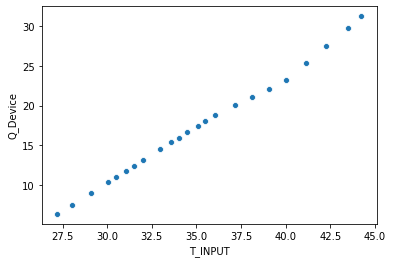

In [6]:
sns.scatterplot("T_INPUT","Q_Device",data=Project);

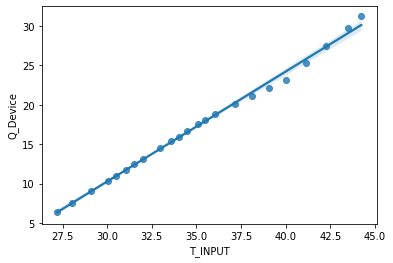

In [7]:
sns.regplot("T_INPUT","Q_Device",data=Project,order=1);

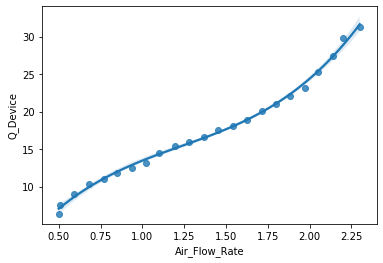

In [8]:
sns.regplot("Air_Flow_Rate","Q_Device",data=Project,order=3);

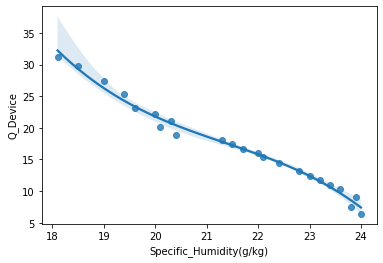

In [9]:
sns.regplot("Specific_Humidity(g/kg)","Q_Device",data=Project,order=3);

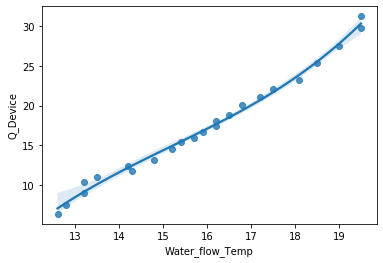

In [10]:
sns.regplot("Water_flow_Temp","Q_Device",data=Project,order=3);

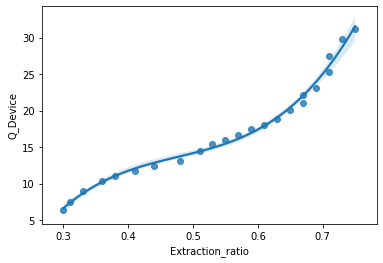

In [11]:
sns.regplot("Extraction_ratio","Q_Device",data=Project,order=3);

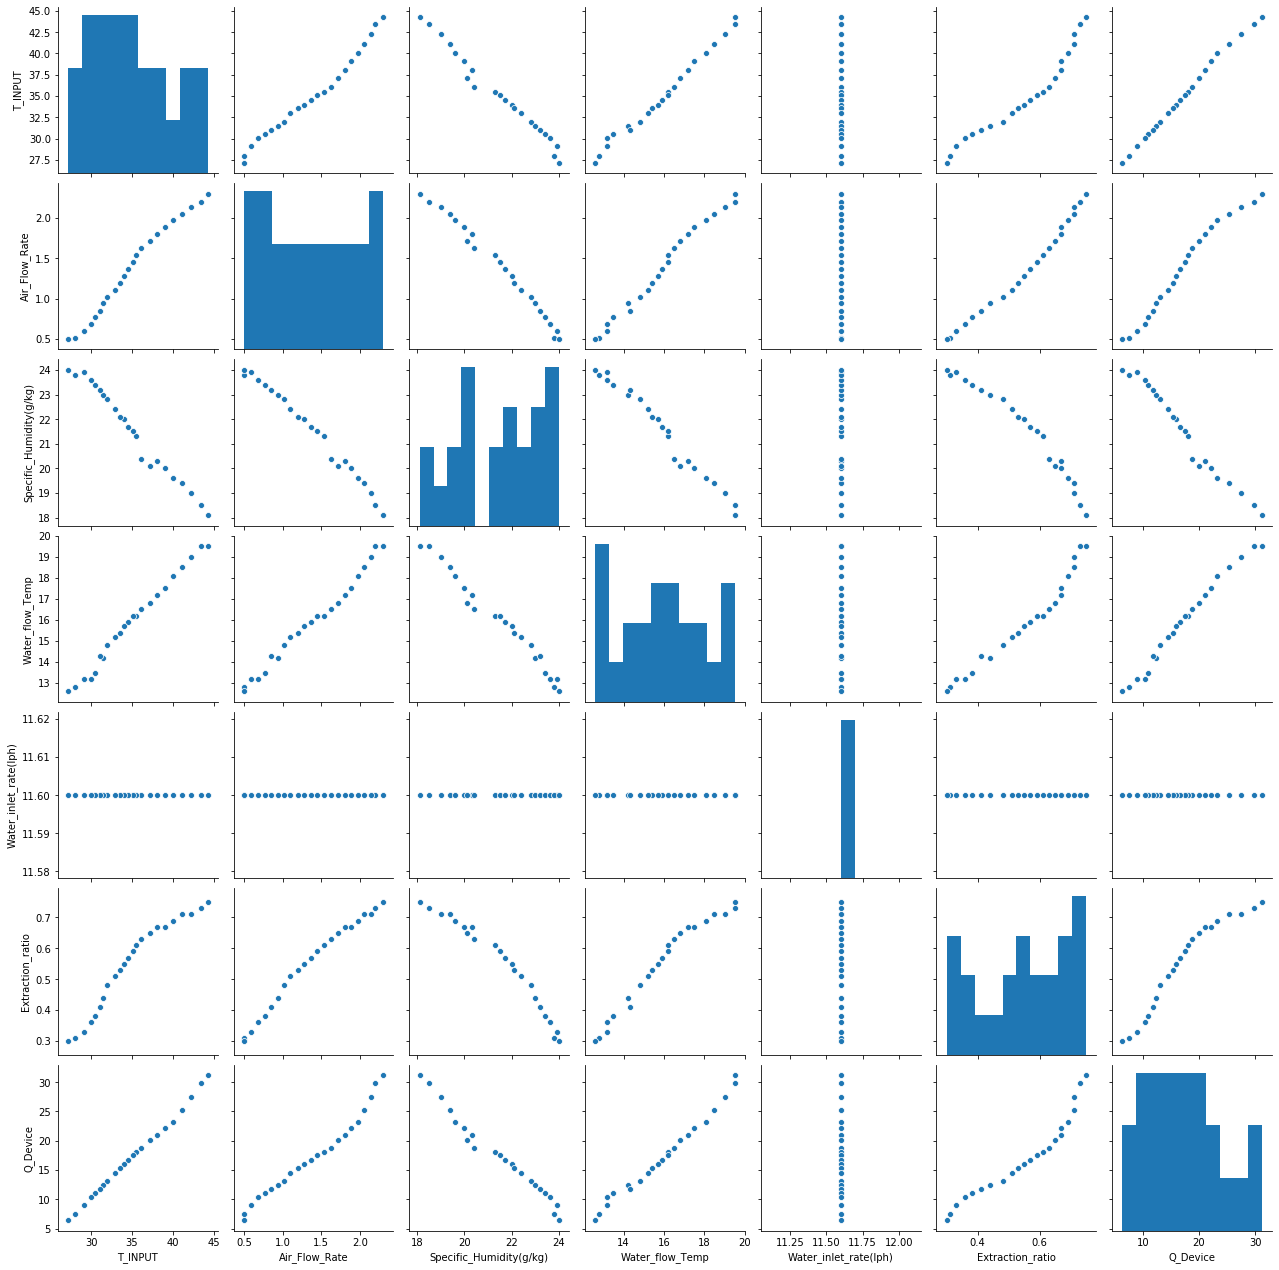

In [12]:
sns.pairplot(Project);

### Data Preprocessing

In [13]:
Input = Project.drop(columns=["Q_Device"])
# taking T_OUTPUT as output column,which have to measure based on the input vari

In [14]:
Input.shape

(23, 6)

In [15]:
Output = Project[["Q_Device"]]

In [16]:
Output.shape

(23, 1)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

In [19]:
sc_ = sc.fit_transform(Input)

In [20]:
Scaled_project = pd.DataFrame(sc_,columns=['T_INPUT','Air_Flow_Rate','Specific_Humidity','Water_flow_Temp','water_F.R(lph)',
                                'Extraction_ratio'])

In [21]:
Scaled_project.head(23)

,T_INPUT,Air_Flow_Rate,Specific_Humidity,Water_flow_Temp,water_F.R(lph),Extraction_ratio
0,1.892589,1.656739,-1.869059,1.715775,1.0,1.426634
1,1.739789,1.478778,-1.648039,1.715775,1.0,1.286109
2,1.487874,1.372002,-1.371764,1.477185,1.0,1.145584
3,1.256609,1.211837,-1.150744,1.238595,1.0,1.145584
4,1.025343,1.069468,-1.040234,1.047722,1.0,1.005059
5,0.822986,0.918201,-0.819215,0.761414,1.0,0.864534
6,0.624758,0.766935,-0.653450,0.618260,1.0,0.864534
7,0.434790,0.612108,-0.763960,0.427388,1.0,0.724009
8,0.201460,0.459062,-0.598195,0.284234,1.0,0.583484
9,0.087892,0.304236,-0.100900,0.141079,1.0,0.442959


### Modelling

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(sc_,Output, test_size=0.2, random_state=0)
# we take 20% of our data for the test purpose to check how accurate our model is
# first it train on the training data then after trainig we can check for the new data

In [23]:
X_train.shape

(18, 6)

In [24]:
X_test.shape

(5, 6)

In [25]:
Y_train.shape

(18, 1)

In [26]:
Y_test.shape

(5, 1)

In [27]:
Y_test

,Q_Device
11,16.650
10,17.500
21,7.551
14,14.510
20,9.060


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()

In [30]:
reg.fit(X_train,Y_train)

LinearRegression()

In [31]:
print('Training Score :', reg.score(X_train, Y_train))
print('Testing Score. :', reg.score(X_test, Y_test))
## its a quite good score but but we see that our data follow some polynomial type of trend so we have to check for other also

Training Score : 0.9974397643981691
Testing Score. : 0.9911987949817572


## Predicting the value from test

In [32]:
X_test[0,:]

array([-0.11859544,  0.00170224,  0.12011945, -0.0020747 ,  1.        ,
        0.16190926])

In [33]:
reg.predict([X_test[0,:]])

array([[16.33784155]])

In [34]:
y_pred = reg.predict(X_test)
y_pred

array([[16.33784155],
       [17.06969517],
       [ 8.0583782 ],
       [14.89217101],
       [ 9.22514421]])

In [35]:
Y_test

,Q_Device
11,16.650
10,17.500
21,7.551
14,14.510
20,9.060


In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mse = mean_squared_error(Y_test,y_pred)
rmse =np.sqrt(mse)

In [38]:
print("mse",mse)
print("rmse",rmse)

mse 0.14267301262391122
rmse 0.3777208130668884


### Polynomial model
as we have seen from data visualisation that our model best fit for 2nd degree,so lets check with one higher degree

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly = PolynomialFeatures(2)

In [41]:
X_poly = poly.fit_transform(Input)
X_poly

array([[1.0000000e+00, 4.4240000e+01, 2.3000000e+00, 1.8100000e+01,
        1.9500000e+01, 1.1600000e+01, 7.5000000e-01, 1.9571776e+03,
        1.0175200e+02, 8.0074400e+02, 8.6268000e+02, 5.1318400e+02,
        3.3180000e+01, 5.2900000e+00, 4.1630000e+01, 4.4850000e+01,
        2.6680000e+01, 1.7250000e+00, 3.2761000e+02, 3.5295000e+02,
        2.0996000e+02, 1.3575000e+01, 3.8025000e+02, 2.2620000e+02,
        1.4625000e+01, 1.3456000e+02, 8.7000000e+00, 5.6250000e-01],
       [1.0000000e+00, 4.3500000e+01, 2.2000000e+00, 1.8500000e+01,
        1.9500000e+01, 1.1600000e+01, 7.3000000e-01, 1.8922500e+03,
        9.5700000e+01, 8.0475000e+02, 8.4825000e+02, 5.0460000e+02,
        3.1755000e+01, 4.8400000e+00, 4.0700000e+01, 4.2900000e+01,
        2.5520000e+01, 1.6060000e+00, 3.4225000e+02, 3.6075000e+02,
        2.1460000e+02, 1.3505000e+01, 3.8025000e+02, 2.2620000e+02,
        1.4235000e+01, 1.3456000e+02, 8.4680000e+00, 5.3290000e-01],
       [1.0000000e+00, 4.2280000e+01, 2.140000

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, Output, test_size=0.2, random_state=0)
# we take 20% of our data for the test purpose to check how accurate our model is
# first it train on the training data then after trainig we can check for the new data

In [43]:
reg.fit(X_train, y_train)
print('Training Score :', reg.score(X_train, y_train))
print('Testing Score. :', reg.score(X_test, y_test))
# we can see the score that how accurate our model is using poly(degree=2)
# as it predict our Train data 99.45% accurate
# butit performs very poor in test data, so this will be not good for our model.

Training Score : 1.0
Testing Score. : 0.979545899916879


In [44]:
y_pred = reg.predict(X_test)
y_pred

array([[16.80037822],
       [17.49797081],
       [ 6.35104844],
       [14.21950455],
       [ 8.72686428]])

In [45]:
mse = mean_squared_error(Y_test,y_pred)
rmse =np.sqrt(mse)

In [46]:
print("mse",mse)
print("rmse",rmse)

mse 0.3315736962519393
rmse 0.575824362329295


### This model does not give very good testing score as linear regression testing score